# MIDTERM PROJECT - COGNATE 3

CABARLES, JHON PERSON V. 
ESTUDILLO, EIREENA PATRICIA A. 


### Description:

We implemented data analysis approach based on the datasets 
we obtained at Kaggle (https://www.kaggle.com/kumarajarshi/life-expectancy-who/data) 
to assess the life expectancy of different countries and continents.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random as random
import seaborn as sn

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
life_data = pd.read_csv(r'C:\Users\ESEE Ent\clean_lifeexpectancydata.csv', sep = ',', encoding= 'unicode_escape')
life_data.head()

,Country,Continent,Year,Status,Life_expectancy,AdultMortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Europe,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,...,99,6.00,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Africa,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,...,95,NaN,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Africa,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,...,7,NaN,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,North America,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,...,86,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [32]:
life_data.corr()

,Year,Life_expectancy,AdultMortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,NaN,NaN,0.064788,5.620444e-01,-0.398159,0.058046,0.043700,-0.249039,0.066797,0.000982,-8.903472e-02,0.015208,9.473787e-02,0.078750,0.045266,0.180114,0.180433,-0.049370,0.222182
Life_expectancy,NaN,1.000000,-0.779119,-0.241290,6.037749e-01,0.043964,0.420848,-0.074617,0.516663,-0.271921,0.515602,-1.000000e+00,0.500300,-6.083449e-01,0.454491,-0.048461,-0.475020,-0.475027,0.907364,0.818159
AdultMortality,NaN,-0.779119,1.000000,0.188205,-6.065883e-01,-0.042930,-0.231715,0.051196,-0.369920,0.212004,-0.372392,1.000000e+00,-0.322688,6.210116e-01,-0.335870,0.046170,0.298016,0.302699,-0.657258,-0.546178
infant_deaths,0.064788,-0.241290,0.188205,1.000000,-1.628219e-01,-0.031048,-0.077750,0.801244,-0.223546,0.994219,-0.125336,1.572280e-02,-0.112367,1.013435e-01,-0.117909,0.272891,0.530138,0.530241,-0.208825,-0.175036
Alcohol,0.562044,0.603775,-0.606588,-0.162822,1.000000e+00,-0.164508,0.318386,-0.139312,-0.299575,-0.162931,0.337918,-1.724950e-01,0.320346,-6.274662e-17,0.023103,-0.559505,-0.150021,-0.159581,0.521422,0.597751
percentage_expenditure,-0.398159,0.043964,-0.042930,-0.031048,-1.645076e-01,1.000000,-0.176308,-0.022793,0.179899,-0.031979,-0.010498,6.507419e-01,-0.005551,-5.109093e-02,-0.046414,-0.039951,-0.104300,-0.102833,0.039525,-0.266972
Hepatitis_B,0.058046,0.420848,-0.231715,-0.077750,3.183855e-01,-0.176308,1.000000,0.017389,0.117740,-0.094361,0.607485,-9.114616e-01,0.901481,-3.540589e-01,0.139467,-0.040312,-0.032478,-0.071222,0.330569,0.419700
Measles,0.043700,-0.074617,0.051196,0.801244,-1.393121e-01,-0.022793,0.017389,1.000000,-0.129765,0.765390,-0.027385,1.572280e-02,-0.000897,-2.229512e-02,-0.074306,0.128568,0.343621,0.338803,-0.075762,-0.052599
BMI,-0.249039,0.516663,-0.369920,-0.223546,-2.995752e-01,0.179899,0.117740,-0.129765,1.000000,-0.234626,0.180582,2.246200e-01,0.161416,-2.940630e-01,0.306109,-0.008533,-0.494933,-0.510220,0.579422,0.388361
under-five_deaths,0.066797,-0.271921,0.212004,0.994219,-1.629311e-01,-0.031979,-0.094361,0.765390,-0.234626,1.000000,-0.142452,1.572280e-02,-0.131411,1.281086e-01,-0.123120,0.311744,0.522158,0.521144,-0.230872,-0.192058


In [33]:
life_data.describe()

,Year,Life_expectancy,AdultMortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,193.000000,183.000000,183.000000,193.000000,15.000000,193.000000,184.000000,193.000000,189.000000,193.000000,193.000000,12.000000,193.000000,193.000000,159.000000,1.440000e+02,189.000000,189.000000,176.000000,180.000000
mean,2014.896373,71.616940,152.863388,22.569948,2.690000,9.109488,82.081522,1425.031088,43.882011,29.974093,83.202073,7.935833,84.554404,0.631606,7021.962512,1.094329e+07,4.380423,4.417989,0.692727,12.785556
std,0.444453,8.123706,97.561184,81.646893,3.907151,72.448163,24.771279,7642.736069,21.599148,105.170369,24.369670,4.489925,22.413454,1.315131,11549.579643,2.878857e+07,4.087889,4.168371,0.152309,3.177419
min,2013.000000,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,3.580000,6.000000,0.100000,33.681223,2.920000e+02,0.100000,0.100000,0.347000,0.000000
25%,2015.000000,65.750000,74.000000,0.000000,0.010000,0.000000,78.000000,0.000000,24.300000,0.000000,83.000000,5.347500,83.000000,0.100000,760.493500,2.207860e+05,1.500000,1.400000,0.572500,10.800000
50%,2015.000000,73.900000,138.000000,2.000000,0.010000,0.000000,93.000000,9.000000,51.100000,2.000000,93.000000,6.320000,94.000000,0.100000,2878.338370,1.894576e+06,3.300000,3.300000,0.723500,13.100000
75%,2015.000000,76.950000,213.000000,15.000000,5.285000,0.000000,97.000000,188.000000,62.100000,20.000000,97.000000,8.437500,97.000000,0.300000,6828.810680,9.846223e+06,6.400000,6.400000,0.798000,15.000000
max,2015.000000,88.000000,484.000000,910.000000,10.660000,871.878317,99.000000,90387.000000,87.300000,1100.000000,99.000000,17.240000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


In [34]:
status = pd.get_dummies(life_data.Status)

In [35]:
life_data = pd.concat([life_data, status], axis = 1)

In [43]:
life_data.head()

,Country,Continent,Year,Status,Life_expectancy,AdultMortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Developed,Developing
0,Afghanistan,Asia,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Albania,Europe,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99,6.00,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0,1
2,Algeria,Africa,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95,NaN,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0,1
3,Angola,Africa,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7,NaN,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0,1
4,Antigua and Barbuda,North America,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,0,1


# DATA VISUALIZATIONS

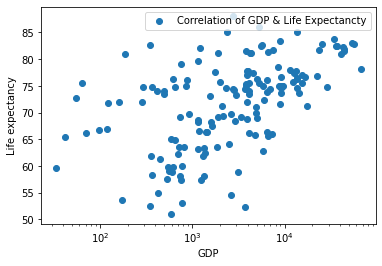

In [50]:
plt.scatter(life_data.GDP, life_data['Life_expectancy'])
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.legend(['Correlation of GDP & Life Expectancty'])
plt.show()

### As we can see with the plot, we can tell that the higher GDP usually corresponds to a higher life expectancy. To become clear we used a logarithmic scale to you display the GDP. Therefore, we conclude that there is a positive correlation.

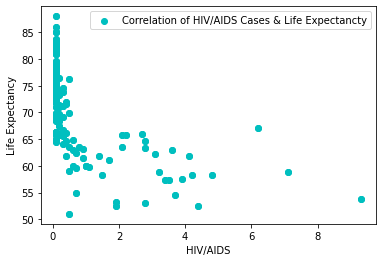

In [46]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life_expectancy'], color = 'c')
plt.scatter(life_data[' HIV/AIDS'], life_data['Life_expectancy'], color = 'c')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.legend(['Correlation of HIV/AIDS Cases & Life Expectancty'])
plt.show()

Text(0, 0.5, 'Life expectancy')

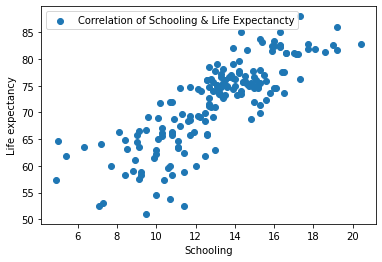

In [68]:
plt.scatter(life_data['Schooling'], life_data['Life_expectancy'])
plt.xlabel('Schooling')
plt.legend(['Correlation of Schooling & Life Expectancty'])
plt.ylabel('Life expectancy')

### In this graph, we can see with the plot as well as we can tell that the schooling affects and corresponds to a higher life expectancy. Since education may result in increased attention to preventive care that could be beneficial in the long term, raises healthcare costs in the short term. 

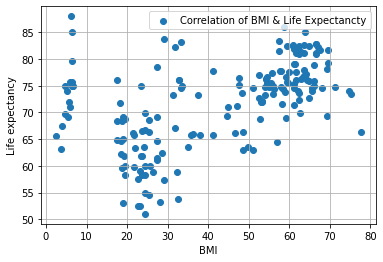

In [48]:
plt.scatter(life_data[' BMI '], life_data['Life_expectancy'])
axes = plt.axes()
axes.grid()
plt.xlabel('BMI')
plt.ylabel('Life expectancy')
plt.legend(['Correlation of BMI & Life Expectancty'])

### Obesity and overweight in adulthood are associated with large decreases in life expectancy and increases in early mortality. Therefore, BMI Status in adulthood is a powerful predictor of death at older ages.

### LIFE EXPECTANCY BASED ON GDP OF ASIA AND EUROPE

Text(0, 0.5, 'Life expectancy')

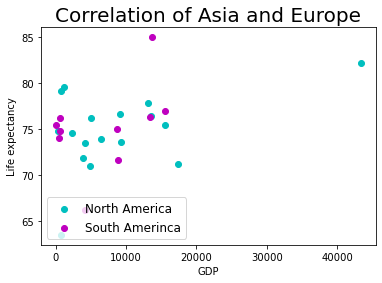

In [53]:
fig, ax = plt.subplots()
plt.title("Correlation of Asia and Europe", fontsize=20)

ax.scatter(x=sample[sample.Continent == 'North America']['GDP'], y=sample[sample.Continent == 'North America']['Life_expectancy'], color = 'c')
ax.scatter(x=sample[sample.Continent == 'South America']['GDP'], y=sample[sample.Continent == 'South America']['Life_expectancy'], color = 'm')
ax.legend(labels=['North America','South Amerinca'], loc='lower left', fontsize=12)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

### LIFE EXPECTANCY BASED ON GDP OF AFRICA AND NORTH AMERICA

Text(0, 0.5, 'Life expectancy')

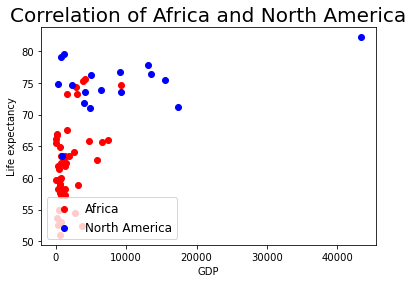

In [52]:
fig, ax = plt.subplots()
plt.title("Correlation of Africa and North America", fontsize=20)

ax.scatter(x=sample[sample.Continent == 'Africa']['GDP'], y=sample[sample.Continent == 'Africa']['Life_expectancy'], color = 'r')
ax.scatter(x=sample[sample.Continent == 'North America']['GDP'], y=sample[sample.Continent == 'North America']['Life_expectancy'], color = 'b')
ax.legend(labels=['Africa','North America'], loc='lower left', fontsize=12)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

## Line Plots for Life Expectancy for different Continent

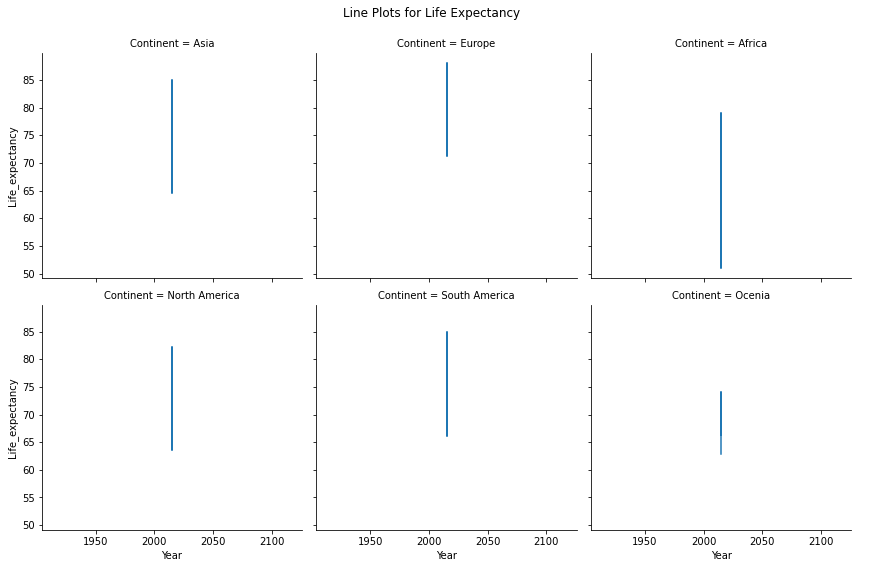

In [25]:
g3 = sns.FacetGrid(life_data, col="Continent", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "Life_expectancy").add_legend())
plt.subplots_adjust(top=0.9)
g3.fig.suptitle('Line Plots for Life Expectancy')
plt.show()

### For the graph above, we put the 'Years'on the X axis whils the Life Expectancy is on the Y axis. Next, we split up all the columns by Country. We can see at the graphs that the Europe have the highest life expectancy among all since they are developed country and they can be able to afford to buy superior nutrition and healthcare.

## Violin Plots To Compare Life Expectancy Distribution

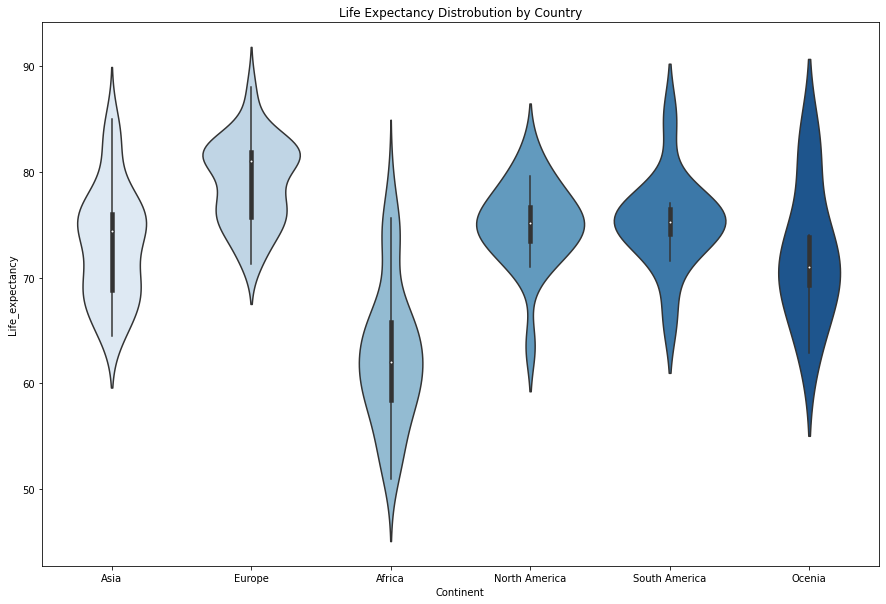

In [56]:
fig = plt.subplots(figsize=(15, 10))
sns.violinplot (data= life_data, x='Continent', y='Life_expectancy', palette="Blues")
plt.title('Life Expectancy Distrobution by Country')
plt.show()

### In the figure above, we used a Violin Plot and it is another way to compare two datasets to visualize the distributions of each. The main advantage of a violin plot is that it shows you concentrations of data. As we can see at the distribution, Africa has change the most on the Life expectancy


Text(0.5, 1.0, '')

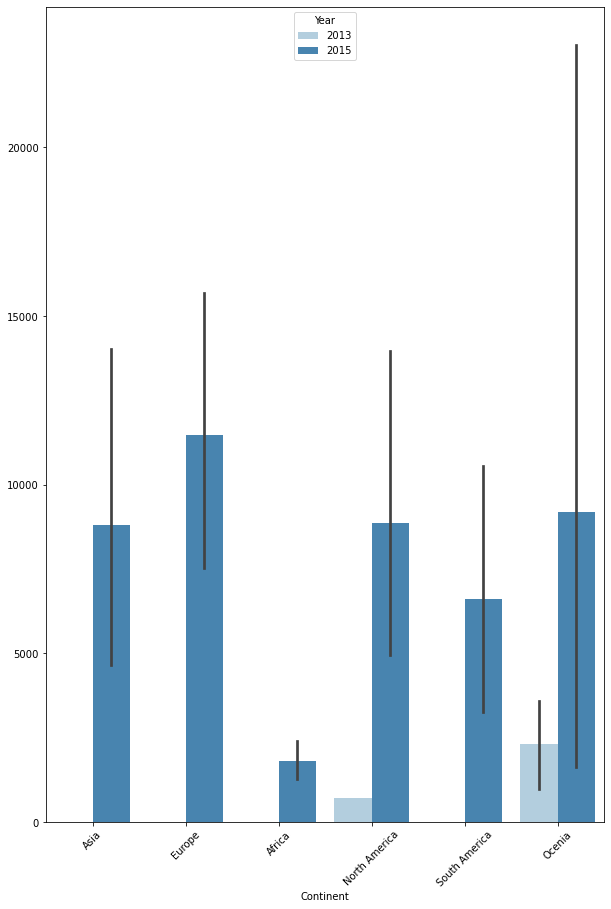

In [73]:
#LINE PLOT

f, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot (x="Continent", y="GDP", hue="Year", data=life_data, palette="Blues")
plt.xticks(rotation=45)
plt.ylabel("")
plt.title('')

# BAR GRAPHS

### We used Bar Graphs to compare the averages of the different data from the datasets.

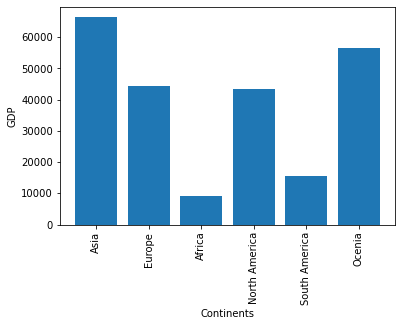

In [72]:
#Bar Graph of Continent corrrelaced to their respective GDP's

plt.bar(life_data.Continent, life_data.GDP)
plt.title("")
plt.xlabel('Continents')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.show()

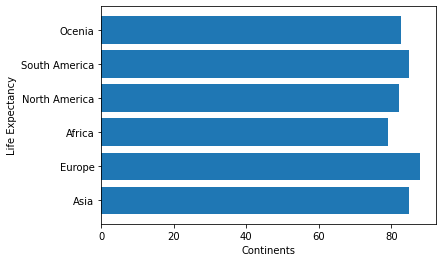

In [71]:
#Bar Graph of Continent corrrelaced to Life Expectancy

plt.barh(life_data.Continent, life_data.Life_expectancy)
plt.xlabel('Continents')
plt.ylabel('Life Expectancy')
plt.show()

<AxesSubplot:>

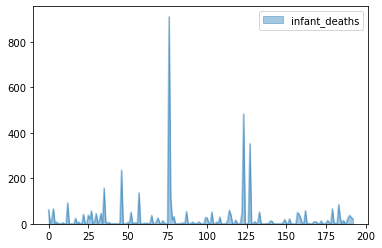

In [61]:
ld1 = pd.read_csv(r'C:\Users\ESEE Ent\clean_lifeexpectancydata.csv', sep = ',', encoding= 'unicode_escape')
ld1[['Continent', 'infant_deaths']].plot.area(alpha = 0.4)

<AxesSubplot:>

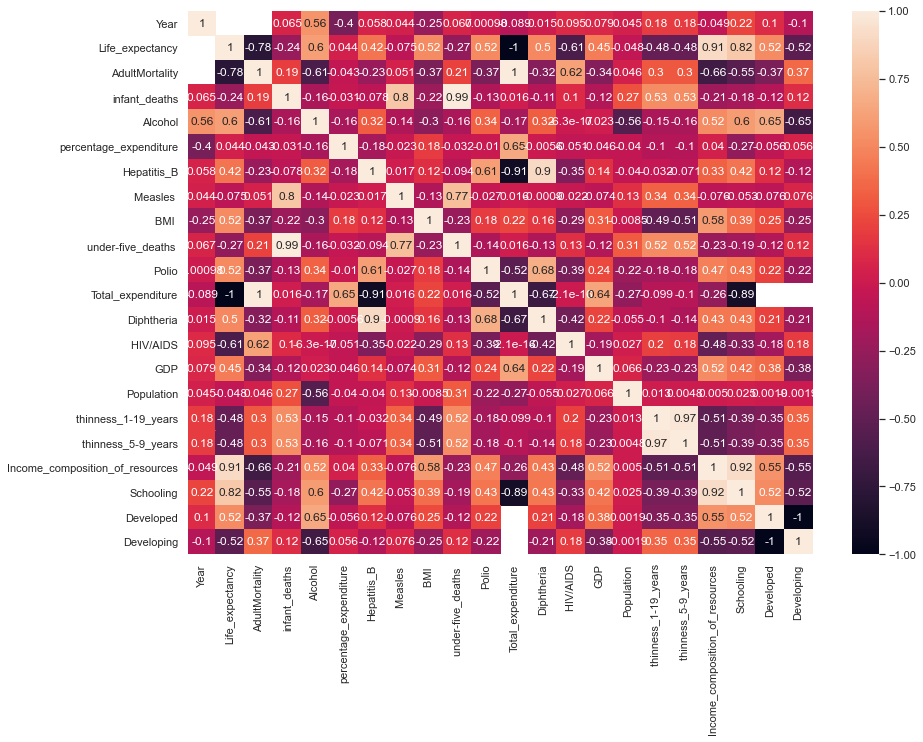

In [381]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

### In this section, to display it in a more generalized way, we use the heatmap to view the numeric values.

# PREDICTIVE ANALYSIS

### Preprocessing Data

In [58]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)
life_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [59]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [60]:
life_labels.isnull().sum()

10

In [61]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [62]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [63]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [64]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [65]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size = 0.3)

### Linear Regression and additions

In [66]:
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression()

In [67]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.93


In [68]:
linear_model_predict = linear_model.predict(life_features_test)

In [69]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, linear_model_predict))

Coefficients: 
 [-27.55257452   1.48180548   1.28207467   3.65308606  -2.40929647
   6.89479297   2.38522451 -34.8053729   -2.65114976   0.4776264
  11.14838777  -5.17340415  -0.20901516   7.77899268 -35.38537451
  34.68459166   4.47910744   7.19102549  -0.11041738   0.11041738]
Mean squared error: 15.47


In [103]:
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Mean absolute error: 2.48
R_square score: 0.77


### The first algorithm that we used for the Predictive Analysis is the Linear Regression since it is easy to implement. As well as, we find the nature of the relationship between variables.

## RIDGE Regression 

In [105]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_

Best Parameters: {'alpha': 1, 'max_iter': 10}


In [106]:
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, linear_model_predict))

R^2 score on training data: 0.91
R^2 score: 0.88
Mean squared error: 15.47
Mean absolute error: 2.48


### With this model, we add a penalty parameter that is equivalent to the square of the magnitude of the coefficients. The first part of code instantiates the Ridge Regression model with an alpha ranges. Whilst the next part, fits the model to the training data.



## LASSO

In [107]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_

Best Parameters: {'alpha': 0, 'max_iter': 10}


In [108]:
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, linear_model_predict))

R^2 score on training data: 0.93
R^2 score: 0.77
Mean squared error: 15.47
Mean absolute error: 2.48


### Here, we use Lasso, and the loss function is modified to minimize the complexity of the model. The first phase of code instantiates the Lasso Regression model. Then the following is to fits the model and code predicts. Lastly, to print all evaluations such as R^2 scores and MSR, MAR.

## ELASTICNET

In [111]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]}, scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 10}


In [112]:
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, linear_model_predict))

R^2 score on training data: 0.93
R^2 score: 0.77
Mean squared error: 15.47
Mean absolute error: 2.48


## Linear Regression with Polynomial Features

In [113]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(life_features_train)
life_features_train_quad = quad_feature_transformer.transform(life_features_train)
life_features_test_quad = quad_feature_transformer.transform(life_features_test)

In [114]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, life_labels_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, life_labels_train)
print(accuracy_score_quad)

1.0


In [115]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [116]:
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, poly_model_quad_predict))

Mean squared error: 2030.00
Mean absolute error: 19.34
R_square score: -29.54


## Decision Tree Regression

In [117]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(life_features_train, life_labels_train)
decision_tree_score = cross_val_score(decision_tree_fit, life_features_train, life_labels_train, cv = 5)

In [118]:
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"% r2_score(life_labels_test, decision_tree_fit.predict(life_features_test)))

mean cross validation score: 0.84
score without cv: 1.00
R^2 score on the test data 0.78


In [126]:
decision_tree_model_predict = decision_tree_model.predict(life_features_test)
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),param_grid={'min_samples_split': range(2, 10)}, scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_
print("Best Parameters: " + str(grid_cv.best_params_))

Best Parameters: {'min_samples_split': 4}


In [127]:
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, decision_tree_model_predict))

R^2 score on training data: 1.00
R^2 score: 0.74
Mean squared error: 14.81
Mean absolute error: 2.73


## Random Forest Regression

In [128]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)

In [129]:
print("mean cross validation score: %.2f"% np.mean(random_forest_score))
print("score without cv: %.2f"% random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"%r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))

mean cross validation score: 0.92
score without cv: 0.99
R^2 score on the test data 0.90


In [130]:
random_forest_model_predict = random_forest_model.predict(life_features_test)

In [132]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid={'min_samples_split': range(2, 10)},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_
result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))

Best Parameters: {'min_samples_split': 2}


In [189]:
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, random_forest_model_predict))

R^2 score on training data: 0.99
R^2 score: 0.89
Mean squared error: 6.49
Mean absolute error: 1.85
